<a href="https://colab.research.google.com/github/rishavdhungel/learndeep/blob/main/CatvsDog/CatVsDog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastai

In [2]:
from fastai.vision.all import *

In [3]:
path = untar_data(URLs.PETS)

In [4]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [5]:
files = get_image_files(path/"images")
len(files)

7390

In [6]:
files[1],files[6]
#name begins with capital for cats and lowercased for dogs

(Path('/root/.fastai/data/oxford-iiit-pet/images/Bengal_126.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_171.jpg'))

In [7]:
def label_func(f):
  return f[0].isupper() 
#returns boolean

In [8]:
dls = ImageDataLoaders.from_name_func(path,files,label_func,item_tfms=Resize(255))
#item_tfms transform images to 255x255

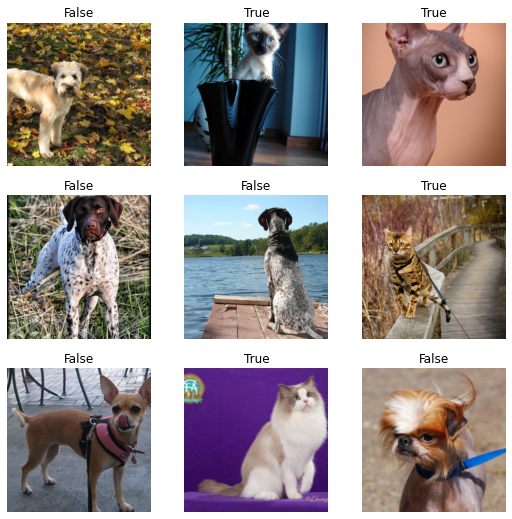

In [9]:
dls.show_batch()

In [10]:
learn = vision_learner(dls,resnet34, metrics=error_rate)
learn.fine_tune(1)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.124867,0.031435,0.012179,01:11


epoch,train_loss,valid_loss,error_rate,time
0,0.051879,0.015123,0.004736,01:05


In [14]:
learn.predict(files[1])


('True', TensorBase(1), TensorBase([8.4048e-09, 1.0000e+00]))

In [13]:
learn.predict(files[7])

('False', TensorBase(0), TensorBase([9.9999e-01, 8.6773e-06]))

In [15]:
#breed classifier
breed_name = r'^(.*)_\d+.jpg'

In [19]:
dls = ImageDataLoaders.from_name_re(path,files,breed_name,item_tfms=Resize(520),batch_tfms = aug_transforms(size=255))

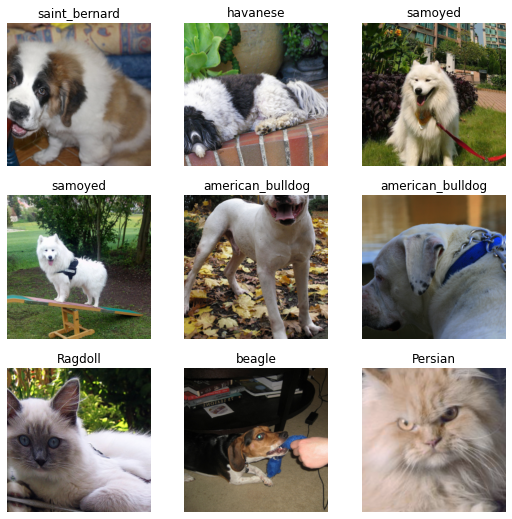

In [20]:
dls.show_batch()

In [21]:
learn = vision_learner(dls,resnet34,metrics=error_rate)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


SuggestedLRs(valley=0.0005754399462603033)

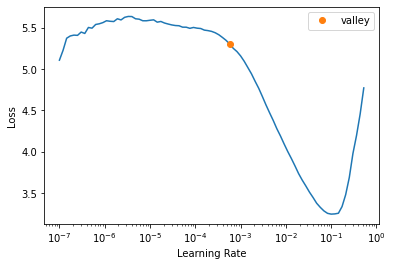

In [22]:
learn.lr_find()

In [23]:
learn.fine_tune(2,3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.288962,0.299901,0.098782,01:32


epoch,train_loss,valid_loss,error_rate,time
0,0.521711,0.387656,0.108254,01:32
1,0.300621,0.212540,0.067659,01:34


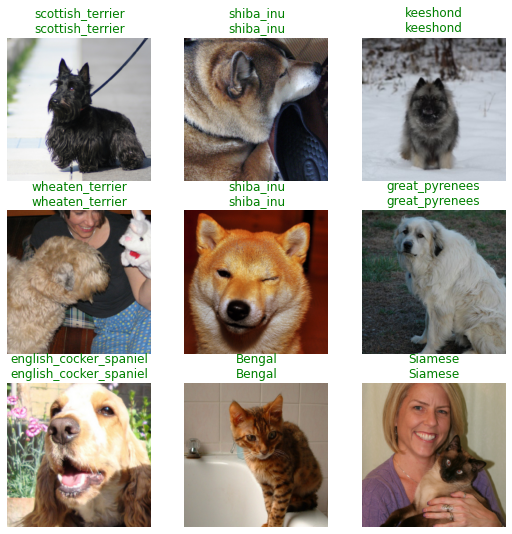

In [24]:
learn.show_results()

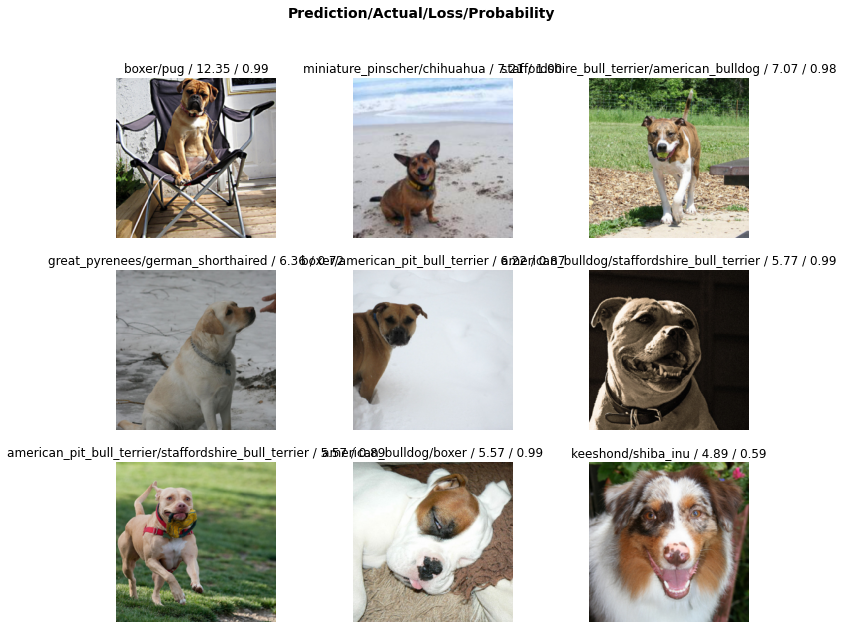

In [27]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9,figsize=(12,10))